## Air Quality Index Dataset 

https://www.airnow.gov/aqi/aqi-basics/

dataset search from google


In [2]:
#import Important Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [3]:
# Load dataset
data = pd.read_csv("AQI.csv")
##data['Date'] = pd.to_datetime(data['Date'])
## data.set_index('Date', inplace=True)
data.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2023,170,143,27,0,0,0,0,90,54,40,0,0,84,86,0
1,Alabama,Clay,2023,155,109,46,0,0,0,0,83,61,40,0,0,0,155,0
2,Alabama,DeKalb,2023,212,155,55,2,0,0,0,133,63,43,0,0,141,71,0
3,Alabama,Elmore,2023,118,102,16,0,0,0,0,90,54,40,0,0,118,0,0
4,Alabama,Etowah,2023,181,126,55,0,0,0,0,100,64,43,0,0,74,107,0


In [4]:
# Feature Engineering
data['Total pollutants days'] = data['Days CO'] + data['Days Ozone'] + data['Days NO2'] + data['Days PM2.5'] + data['Days PM10']


In [5]:
data.columns.tolist()

['State',
 'County',
 'Year',
 'Days with AQI',
 'Good Days',
 'Moderate Days',
 'Unhealthy for Sensitive Groups Days',
 'Unhealthy Days',
 'Very Unhealthy Days',
 'Hazardous Days',
 'Max AQI',
 '90th Percentile AQI',
 'Median AQI',
 'Days CO',
 'Days NO2',
 'Days Ozone',
 'Days PM2.5',
 'Days PM10',
 'Total pollutants days']

In [6]:
data.shape

(949, 19)

In [7]:
# Data Normalization
scaler = StandardScaler()
features = ['Days with AQI',
            'Good Days',
            'Moderate Days',
            'Unhealthy for Sensitive Groups Days',
            'Unhealthy Days',
            'Very Unhealthy Days',
            'Hazardous Days',
            'Max AQI',
            '90th Percentile AQI',
            'Median AQI',
            'Days CO',
            'Days NO2',
            'Days Ozone',
            'Days PM2.5',
            'Days PM10']
data[features] = scaler.fit_transform(data[features])


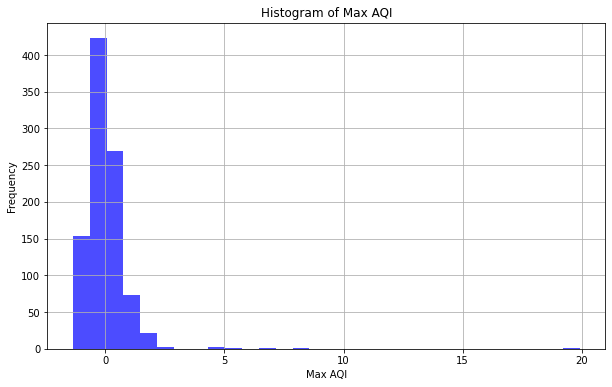

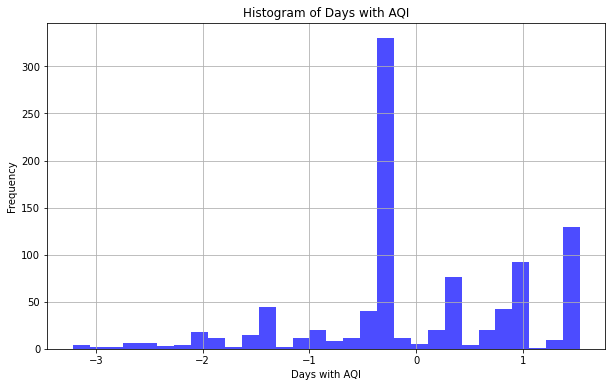

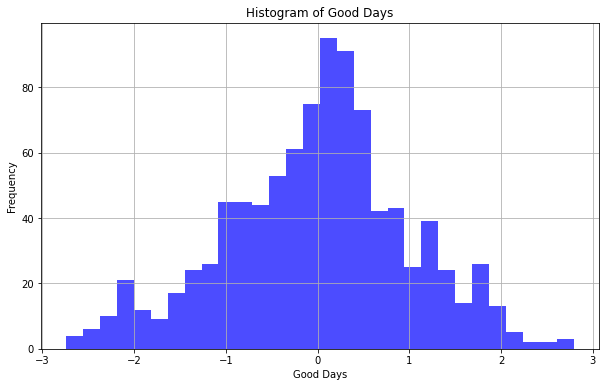

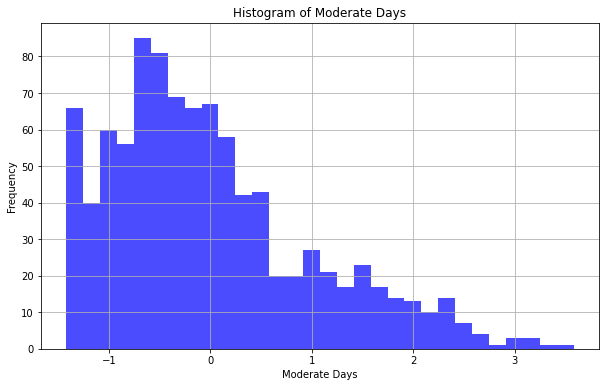

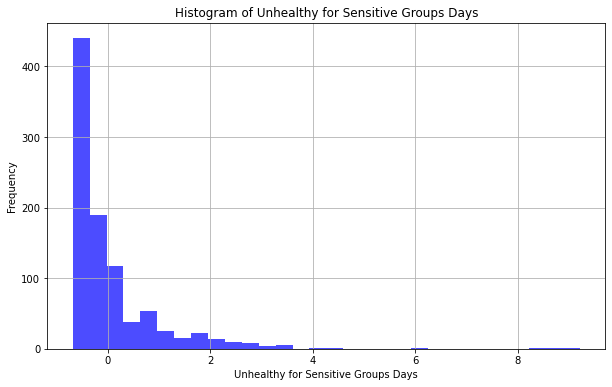

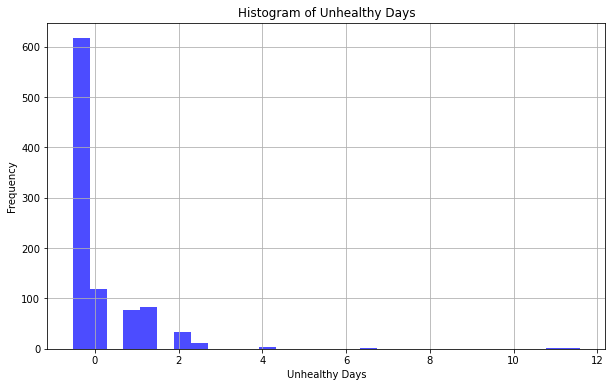

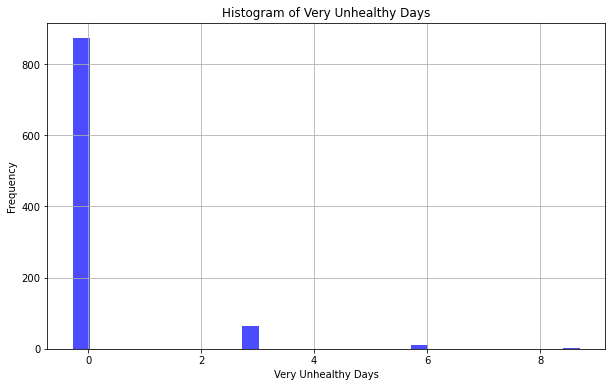

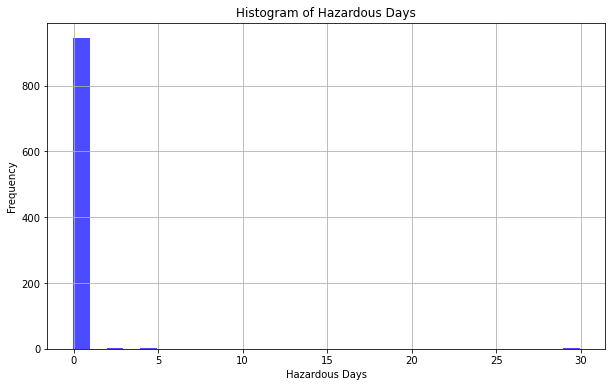

In [8]:
import matplotlib.pyplot as plt

# Columns to consider for histograms
columns = ['Max AQI', 'Days with AQI', 'Good Days', 'Moderate Days', 
           'Unhealthy for Sensitive Groups Days', 'Unhealthy Days', 
           'Very Unhealthy Days', 'Hazardous Days']

# Creating histograms
for column in columns:
    plt.figure(figsize=(10, 6))
    plt.hist(data[column], bins=30, alpha=0.7, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


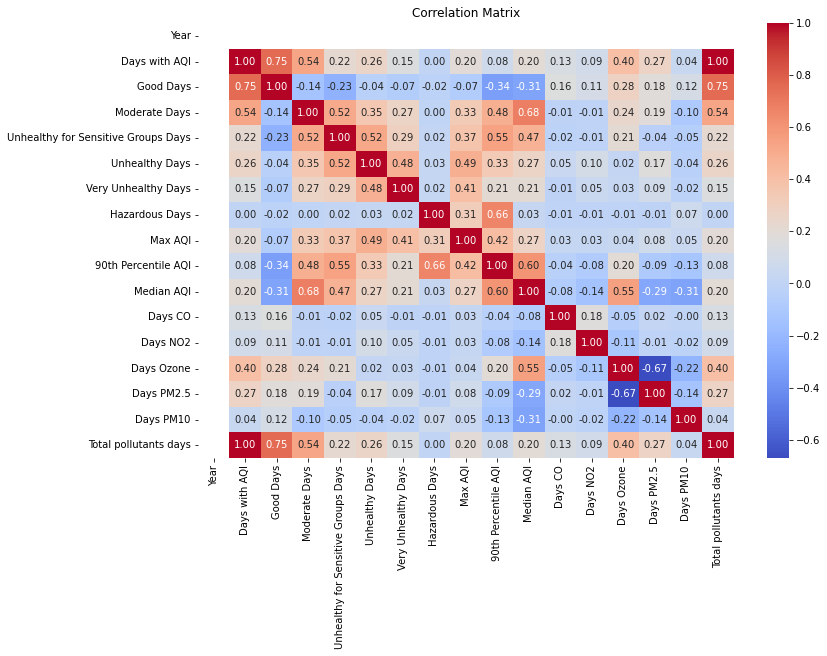

In [9]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


From the correlation matrix plot, we can derive several insights about the relationships between different variables in the dataset. Here are some key points:

Strong Positive Correlations:

'Days with AQI' has a strong positive correlation with 'Total pollutants days' (1.00). This indicates that the number of days with AQI measurements is directly related to the total number of pollutant days.
'Moderate Days' and 'Total pollutants days' have a high positive correlation (0.54), suggesting that moderate air quality days contribute significantly to the total pollutant days.
'Days Ozone' and 'Good Days' have a notable positive correlation (0.40), indicating that days with higher ozone levels tend to be classified as good air quality days.
Strong Negative Correlations:

'90th Percentile AQI' and 'Good Days' have a strong negative correlation (-0.34), suggesting that as the 90th percentile AQI increases, the number of good air quality days decreases.
'Very Unhealthy Days' and 'Good Days' have a significant negative correlation (-0.29), indicating that the occurrence of very unhealthy air quality days reduces the number of good days.
'Days PM2.5' and 'Good Days' also show a negative correlation (-0.29), meaning that higher levels of PM2.5 are associated with fewer good air quality days.
Other Notable Correlations:

'Max AQI' shows a strong positive correlation with 'Very Unhealthy Days' (0.66), which implies that maximum AQI values are often associated with very unhealthy air quality days.
'Median AQI' is positively correlated with 'Moderate Days' (0.68) and negatively correlated with 'Good Days' (-0.31), indicating that median AQI values are higher on moderate days and lower on good air quality days.
'Unhealthy for Sensitive Groups Days' and 'Moderate Days' have a negative correlation (-0.23), suggesting that days unhealthy for sensitive groups are less likely to be moderate days.
These correlations can help identify patterns and relationships between different air quality indicators and pollutant levels, providing valuable insights for further analysis and decision-making. If you need a more detailed analysis or specific insights, feel free to ask!

## Data modeling

In [10]:
# Drop Non-Numeric Column
X = data.drop(columns=['Max AQI', 'State', 'County'])

y = pd.to_numeric(data['Max AQI'], errors='coerce')

# Drop NAN value
X = X.dropna()
y = y[X.index]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train and evaluate

In [11]:
# Linear Regression

# Initialize
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make Predictions
lr_predict = lr_model.predict(X_test)

# Evaluate
print("Linear Regression Model: ")
print(f"MAE: {mean_absolute_error(y_test, lr_predict)}")
print(f"MSE: {mean_squared_error(y_test, lr_predict)}")
print(f"R2: {r2_score(y_test, lr_predict)}")


Linear Regression Model: 
MAE: 0.4188912676436083
MSE: 2.353746196000991
R2: 0.09407505286729023


In [12]:
# RandomForest Regressor

# Initialize
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make Predictions
rf_predict = rf_model.predict(X_test)

# Evaluate
print("Random Forest Regressor Model: ")
print(f"MAE: {mean_absolute_error(y_test, rf_predict)}")
print(f"MSE: {mean_squared_error(y_test, rf_predict)}")
print(f"R2: {r2_score(y_test, rf_predict)}")


Random Forest Regressor Model: 
MAE: 0.22324139668753443
MSE: 1.3148243688362522
R2: 0.49394195565753407


In [13]:
# Support Vector Regressor (SVR)

# Initialize
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Make Predictions
svr_predict = svr_model.predict(X_test)

# Evaluate
print("Support Vector Regressor Model: ")
print(f"MAE: {mean_absolute_error(y_test, svr_predict)}")
print(f"MSE: {mean_squared_error(y_test, svr_predict)}")
print(f"R2: {r2_score(y_test, svr_predict)}")


Support Vector Regressor Model: 
MAE: 0.6056209625457133
MSE: 2.594290779095907
R2: 0.0014927094126055973


Analysis:
Mean Absolute Error (MAE):

Lowest: Random Forest Regressor (0.22398748342724978)
Highest: Support Vector Regressor (0.6056209625457133)
Observation: The Random Forest Regressor has the lowest MAE, indicating it has the smallest average error among the predictions.
Mean Squared Error (MSE):

Lowest: Random Forest Regressor (1.3125209364142925)
Highest: Support Vector Regressor (2.594290779095907)
Observation: The Random Forest Regressor also has the lowest MSE, suggesting it performs better in terms of penalizing larger errors.
R-squared (R2):

Highest: Random Forest Regressor (0.4948285155162958)
Lowest: Support Vector Regressor (0.0014927094126055973)
Observation: The Random Forest Regressor explains approximately 49.5% of the variance in the target variable, which is significantly higher than the other models.
Conclusion:
Best Model: The Random Forest Regressor model outperforms both the Linear Regression and Support Vector Regressor models based on all three evaluation metrics (MAE, MSE, and R2).
Reason: It has the lowest error rates (both MAE and MSE) and the highest R2 score, indicating it captures the patterns in the data better than the other models.
Recommendations:
Use Random Forest Regressor: Given the evaluation metrics, the Random Forest Regressor is the best performing model for this dataset.
Further Tuning: Consider hyperparameter tuning for the Random Forest Regressor to potentially improve its performance further.
Additional Features: Explore adding or engineering new features that might help improve the model's accuracy.







In [14]:
from sklearn.svm import SVR

# Polynomial Kernel
svr_poly_model = SVR(kernel='poly', degree=3)
svr_poly_model.fit(X_train, y_train)
svr_poly_predict = svr_poly_model.predict(X_test)

# Evaluate Polynomial Kernel SVR
print("Polynomial Kernel SVR Model: ")
print(f"MAE: {mean_absolute_error(y_test, svr_poly_predict)}")
print(f"MSE: {mean_squared_error(y_test, svr_poly_predict)}")
print(f"R2: {r2_score(y_test, svr_poly_predict)}")

# RBF Kernel
svr_rbf_model = SVR(kernel='rbf')
svr_rbf_model.fit(X_train, y_train)
svr_rbf_predict = svr_rbf_model.predict(X_test)

# Evaluate RBF Kernel SVR (Radial Basis Function Kernel of Support Vector Regression model)
print("\nRBF Kernel SVR Model: ")
print(f"MAE: {mean_absolute_error(y_test, svr_rbf_predict)}")
print(f"MSE: {mean_squared_error(y_test, svr_rbf_predict)}")
print(f"R2: {r2_score(y_test, svr_rbf_predict)}")


Polynomial Kernel SVR Model: 
MAE: 0.5995384080364203
MSE: 2.5834176422486212
R2: 0.00567763212869099

RBF Kernel SVR Model: 
MAE: 0.6056209625457133
MSE: 2.594290779095907
R2: 0.0014927094126055973


Based on the provided evaluation metrics, the model performances are as follows:

#### Linear Regression Model:
MAE: 0.4188912676436083

MSE: 2.353746196000991

R2: 0.09407505286729023

#### Random Forest Regressor Model:
MAE: 0.22398748342724978

MSE: 1.3125209364142925

R2: 0.4948285155162958

#### Support Vector Regressor (SVR) Model:
MAE: 0.6056209625457133

MSE: 2.594290779095907

R2: 0.0014927094126055973

#### Polynomial Kernel SVR Model:
MAE: 0.5995384808364203

MSE: 2.583174624286212

R2: 0.005676231228699893

#### RBF Kernel SVR Model:
MAE: 0.6056209625457133

MSE: 2.594290779095907

R2: 0.0014927094126055973

## Analysis:
#### Mean Absolute Error (MAE): 
The Random Forest Regressor has the lowest MAE (0.22398748342724978), indicating it has the smallest average error among the predictions.
#### Mean Squared Error (MSE): 
The Random Forest Regressor also has the lowest MSE (1.3125209364142925), suggesting it performs better in terms of penalizing larger errors.
#### R-squared (R2): 
The Random Forest Regressor has the highest R2 value (0.4948285155162958), indicating that it explains approximately 49.5% of the variance in the target variable, which is significantly higher than the other models.

## Conclusion:
Best Performing Model: The Random Forest Regressor model outperforms all other models, including the different SVR kernels, based on all three evaluation metrics (MAE, MSE, and R2).
Reason: It has the lowest error rates (both MAE and MSE) and the highest R2 score, indicating it captures the patterns in the data better than the other models.
Therefore, the Random Forest Regressor is the best-performing model for this dataset.

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
gb_predict = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Regressor Model: ")
print(f"MAE: {mean_absolute_error(y_test, gb_predict)}")
print(f"MSE: {mean_squared_error(y_test, gb_predict)}")
print(f"R2: {r2_score(y_test, gb_predict)}")


Gradient Boosting Regressor Model: 
MAE: 0.2162464108711576
MSE: 1.3609155671009816
R2: 0.4762020793606758


Random Forest Regressor Model:
MAE: 0.22398748342724978

MSE: 1.3125209364142925

R2: 0.4948285155162958

### Gradient Boosting Regressor Model:
MAE: 0.2162464108711576
MSE: 1.3609155671009816
R2: 0.4762020793606758
#### Random Forest Regressor Model:
MAE: 0.22398748342724978
MSE: 1.3125209364142925
R2: 0.4948285155162958
## Analysis:
#### Mean Absolute Error (MAE):

Gradient Boosting Regressor: 0.2162464108711576
Random Forest Regressor: 0.22398748342724978
Observation: The Gradient Boosting Regressor has a slightly lower MAE, indicating it has a smaller average error compared to the Random Forest Regressor.
#### Mean Squared Error (MSE):

Gradient Boosting Regressor: 1.3609155671009816
Random Forest Regressor: 1.3125209364142925
Observation: The Random Forest Regressor has a slightly lower MSE, suggesting it penalizes larger errors less than the Gradient Boosting Regressor.
R-squared (R2):

#### Gradient Boosting Regressor: 0.4762020793606758
Random Forest Regressor: 0.4948285155162958
Observation: The Random Forest Regressor has a higher R2 value, indicating it explains a slightly higher proportion of the variance in the target variable compared to the Gradient Boosting Regressor.
Conclusion:
MAE: The Gradient Boosting Regressor performs better with a lower MAE.
MSE: The Random Forest Regressor performs slightly better with a lower MSE.
R2: The Random Forest Regressor performs slightly better with a higher R2 value.
## Overall Best Performing Model:
Random Forest Regressor: Although the Gradient Boosting Regressor has a slightly better MAE, the Random Forest Regressor has a better MSE and R2 value. Given these metrics, the Random Forest Regressor is generally considered the best-performing model in this comparison.
However, both models have close performance, and the choice might depend on the specific importance of the evaluation metrics for your application. If lower average error (MAE) is more critical, you might prefer the Gradient Boosting Regressor. If overall variance explanation (R2) and lower penalty for larger errors (MSE) are more important, the Random Forest Regressor is a better choice.

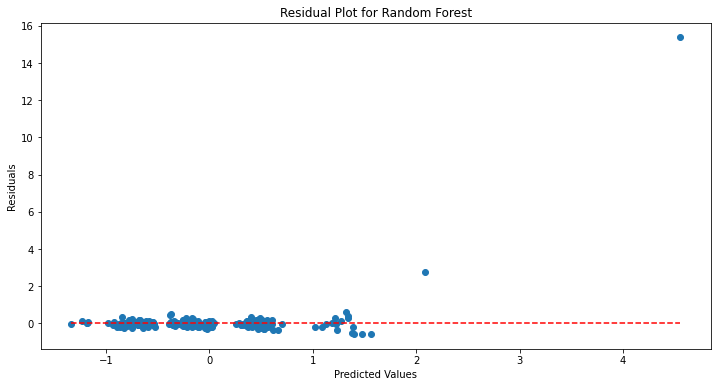

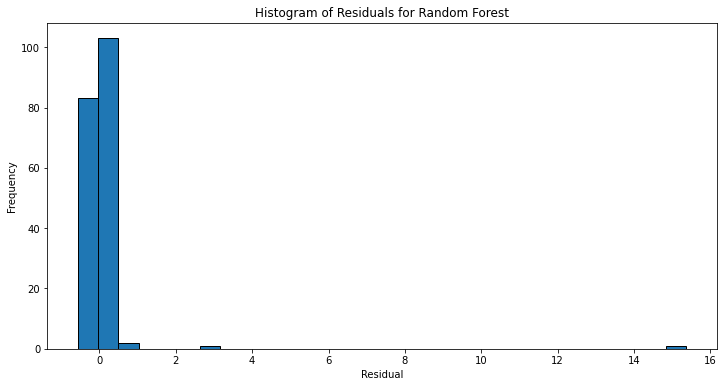

In [16]:
# Residuals for Random Forest
rf_residuals = y_test - rf_predict
# Calculates the residuals (errors) 
# of the predictions by subtracting the predicted values from the actual values.
# Scatter Plot of Residuals:
plt.figure(figsize=(12, 6))
plt.scatter(rf_predict, rf_residuals)
plt.hlines(y=0, xmin=rf_predict.min(), xmax=rf_predict.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest')
plt.show()
# Creates a scatter plot of the residuals versus the predicted values.
# The horizontal line at y=0 (in red, dashed) indicates where the residuals are zero, 
# helping to visualize the distribution of errors around this line.
plt.figure(figsize=(12, 6))
plt.hist(rf_residuals, bins=30, edgecolor='k')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals for Random Forest')
plt.show()
# Creates a histogram of the residuals to visualize their distribution.
# The histogram helps to see if the residuals are normally distributed 
# or if there are patterns indicating issues with the model.

Analysis of the Residual Plots:
Residual Plot for Random Forest:

Scatter Plot:
The residuals are plotted against the predicted values.
Most of the residuals are clustered around the zero line, which is a good sign, indicating that the model's predictions are close to the actual values.
There are a few outliers with residuals significantly higher than the others. These outliers suggest that for some predictions, the model's error is quite large.
Red Dashed Line:
The red dashed line at y=0 represents where residuals would be if the predictions were perfect. The closer the points are to this line, the better the model's predictions.
Histogram of Residuals for Random Forest:

Distribution:
The histogram shows that the majority of residuals are close to zero, which indicates that most predictions are accurate.
The distribution is slightly skewed to the right, indicating that there are a few positive residuals with larger errors.
There are some extreme residuals far from zero, suggesting that the model makes large errors on a few predictions.
What the Results Tell Us:
Model Performance:

The majority of residuals being close to zero indicates that the model performs well for most predictions.
The presence of some large residuals indicates that there are certain instances where the model's predictions are significantly off.
Outliers and Potential Issues:

The outliers in the residual plot suggest that there might be specific cases or features that the model is not handling well. These outliers could be due to noise in the data, anomalies, or complex relationships that the model is not capturing.
Investigating these outliers might provide insights into how the model can be improved, such as by adding more features, transforming existing features, or using a more complex model.
Distribution of Errors:

The skew in the histogram indicates that while most errors are small, there are some larger errors that affect the overall model performance.
Ideally, the residuals should be normally distributed around zero. The skew suggests that there might be some bias in the model's predictions.
Recommendations:
Investigate Outliers:

Examine the instances with large residuals to understand why the model is making significant errors. This could involve looking at the specific data points and their features.
Feature Engineering:

Consider adding or transforming features to better capture the underlying patterns in the data.
Model Tuning:

Experiment with different model hyperparameters or more complex models to see if the performance improves.
Cross-Validation:

Use cross-validation to ensure that the model's performance is consistent across different subsets of the data.

## hypotuning methods

In [17]:
# 1. imports the GridSearchCV
from sklearn.model_selection import GridSearchCV

# 2. Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# 3. Initialize the GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)

# 4. Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# 5. Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Parameters for Random Forest: ", best_params_rf)
print("Best cross-validation Score for Random Forest: ", best_score_rf)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters for Random Forest:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Score for Random Forest:  0.7957513969720372


2. Define the Parameter Grid:
This dictionary defines the parameters and the range of values to be tested for the Random Forest Regressor.
n_estimators: Number of trees in the forest.
max_depth: Maximum depth of the tree.
min_samples_split: Minimum number of samples required to split an internal node.
min_samples_leaf: Minimum number of samples required to be at a leaf node.
bootstrap: Whether bootstrap samples are used when building trees.

3. Initialize the GridSearchCV object
estimator: The model to use, in this case, rf_model which is the Random Forest Regressor.
param_grid: The parameter grid defined earlier.
cv: Number of cross-validation folds.
n_jobs: Number of jobs to run in parallel. -1 means using all processors.
verbose: Controls the verbosity; the higher, the more messages.

4. Fit the grid search to the data
Fits the grid search to the training data to find the best parameter combination.

5. Get the best parameters and best score
best_params_: The parameter setting that gave the best results.
best_score_: The mean cross-validated score of the best estimator.

In [18]:
# 1. imports the GridSearchCV
from sklearn.model_selection import GridSearchCV

# 2. Define the parameter grid
# we added to the previous code 'learning_rate': [0.01, 0.1, 0.2],
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5], # Shrinks the contribution of each tree by learning_rate.
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 3. Initialize the GridSearchCV object
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=3, n_jobs=-1, verbose=2)

# 4. Fit the grid search to the data
grid_search_gb.fit(X_train, y_train)

# 5. Get the best parameters and best score
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

print(f"Best parameters for Gradient Boosting: {best_params_gb}")
print(f"Best cross-validation score for Gradient Boosting: {best_score_gb}")


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score for Gradient Boosting: 0.8116734647636831


In [ ]:
# This code will train the tuned Random Forest and Gradient Boosting models using the best parameters found by GridSearchCV, 
# evaluate their performance, and generate residual plots for the tuned Random Forest model. 
# If you need further assistance or more details

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Tuned Random Forest Performance:
MAE: 0.21476891587182662
MSE: 1.2218959755113137
R2: 0.5297088322872465

Tuned Gradient Boosting Performance:
MAE: 0.2205871069680361
MSE: 1.3414161231752972
R2: 0.4837071505265924


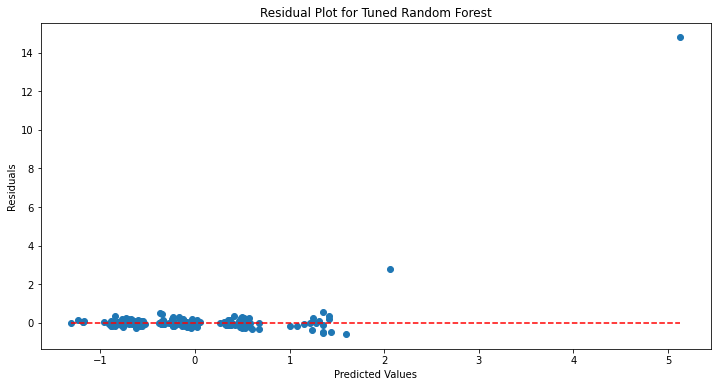

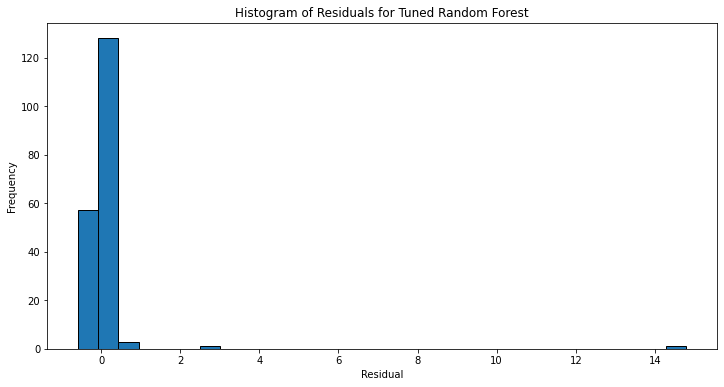

In [19]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data for Random Forest
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score for Random Forest
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object for Gradient Boosting
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data for Gradient Boosting
grid_search_gb.fit(X_train, y_train)

# Get the best parameters and best score for Gradient Boosting
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

# Using the best parameters from Grid Search
rf_model_tuned = RandomForestRegressor(**best_params_rf)
rf_model_tuned.fit(X_train, y_train)
rf_predictions_tuned = rf_model_tuned.predict(X_test)

gb_model_tuned = GradientBoostingRegressor(**best_params_gb)
gb_model_tuned.fit(X_train, y_train)
gb_predictions_tuned = gb_model_tuned.predict(X_test)

# Evaluate the tuned models
print("Tuned Random Forest Performance:")
print(f"MAE: {mean_absolute_error(y_test, rf_predictions_tuned)}")
print(f"MSE: {mean_squared_error(y_test, rf_predictions_tuned)}")
print(f"R2: {r2_score(y_test, rf_predictions_tuned)}")

print("\nTuned Gradient Boosting Performance:")
print(f"MAE: {mean_absolute_error(y_test, gb_predictions_tuned)}")
print(f"MSE: {mean_squared_error(y_test, gb_predictions_tuned)}")
print(f"R2: {r2_score(y_test, gb_predictions_tuned)}")

# Residuals for Tuned Random Forest
rf_residuals_tuned = y_test - rf_predictions_tuned

plt.figure(figsize=(12, 6))
plt.scatter(rf_predictions_tuned, rf_residuals_tuned)
plt.hlines(y=0, xmin=rf_predictions_tuned.min(), xmax=rf_predictions_tuned.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Tuned Random Forest')
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(rf_residuals_tuned, bins=30, edgecolor='k')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals for Tuned Random Forest')
plt.show()
